In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
niners_csvs = os.listdir('Niners_CSVs')
niners_dfs = [pd.read_csv('Niners_CSVs/'+csv) for csv in niners_csvs]
for df in niners_dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [3]:
len(niners_dfs[0])

899

In [4]:
b_game_1 = niners_dfs[0]

In [5]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
49ersSupporters    153
Chris01158505       15
CJ061383            13
49ersSportsTalk     10
kareemslick          9
dtype: int64


User
davidkli        9
Mandersflag     8
Rod_cali247     7
madesense84     7
alphainspire    6
dtype: int64

In [6]:
niners_dfs[0].head()

,Unnamed: 0,ID,Date,User,Tweet,HashTags,Likes,Retweets,MentionUsers,LocationCoordinates,clean_Tweet,NLTK_Sentiment_Analysis,TextBlob_Sentiment_Analysis,Compound_Sentiment_Score,Positive_Sentiment
0,0,1574909093998784514,2022-09-27 23:49:23+00:00,Bambamlld,"We've got 99 problems, but Trey ain't one...@t...","['treylance', 'TreyWayOrNoWay', 'Niners', '49e...",0,0,"[User(username='treylance09', id=2764455717, d...",NaN,weve got 99 problems trey aint one,-0.4019,0.0,-0.4019,False
1,1,1574904469598478339,2022-09-27 23:31:00+00:00,49ersSupporters,Kyle Shanahan defends Jimmy Garoppolo after sl...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,kyle shanahan defends jimmy garoppolo slow sta...,0.0000,-0.3,-0.3000,False
2,2,1574901953452285964,2022-09-27 23:21:00+00:00,49ersSupporters,49ers' defense dominant despite team's losing ...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",1,0,NaN,NaN,49ers defense dominant despite teams losing re...,0.3987,0.9,1.2987,True
3,3,1574901700535754758,2022-09-27 23:20:00+00:00,49ersSupporters,NFL Power Rankings: Where the 49ers Stand Foll...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,nfl power rankings 49ers stand following snf loss,-0.3182,0.0,-0.3182,False
4,4,1574899687802511387,2022-09-27 23:12:00+00:00,49ersSupporters,'Bullcrap Report' of QB Jimmy Garoppolo Trade?...,"['SanFrancisco49ers', '49ers', 'SF49ers', 'Nin...",0,0,NaN,NaN,bullcrap report qb jimmy garoppolo trade 3 rea...,0.3182,-0.4,-0.0818,False


In [7]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Scores over Time Scatter Plot',fontsize=12)
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save:
        plt.savefig(fig_name)

In [8]:
niners_csvs

['Niners_Game3_Broncos.csv',
 'Niners_Game6_Falcons.csv',
 'Niners_Game11_Saints.csv',
 'Niners_Game4_Rams.csv',
 'Niners_Game10_Cardinals.csv',
 'Niners_Game2_Seahawks.csv',
 'Niners_Game9_Chargers.csv',
 'Niners_Game7_Chiefs.csv',
 'Niners_Game8_Rams.csv',
 'Niners_Game1_Bears.csv',
 'Niners_Game5_Panthers.csv']

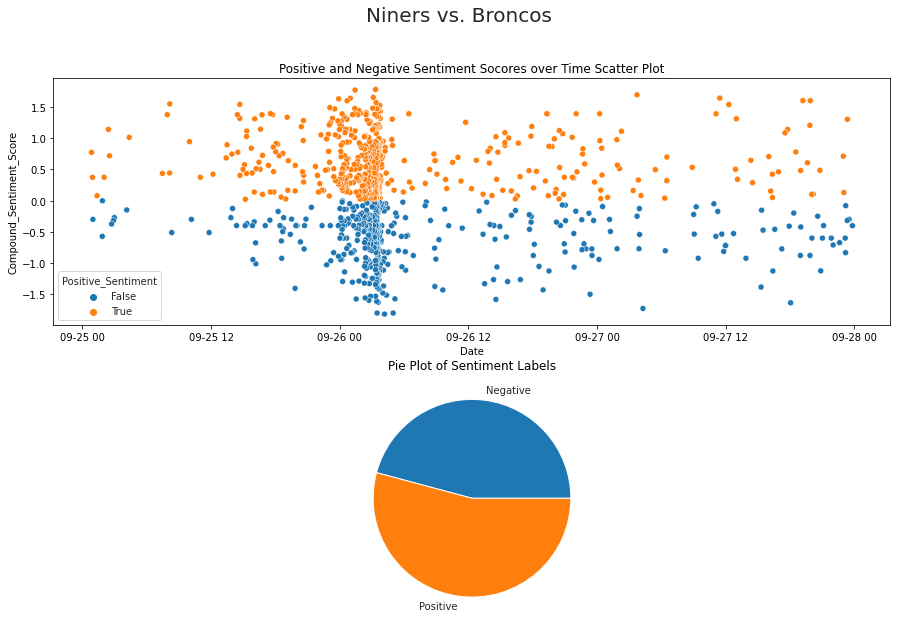

In [9]:
make_scatter_and_pie_figure(niners_dfs[0], 'Niners vs. Broncos')

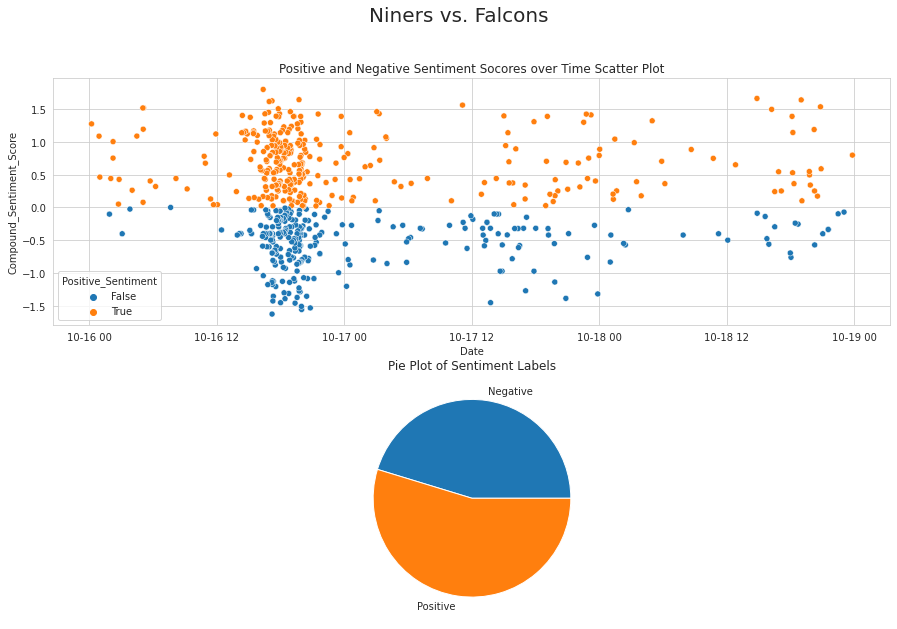

In [10]:
make_scatter_and_pie_figure(niners_dfs[1], 'Niners vs. Falcons')

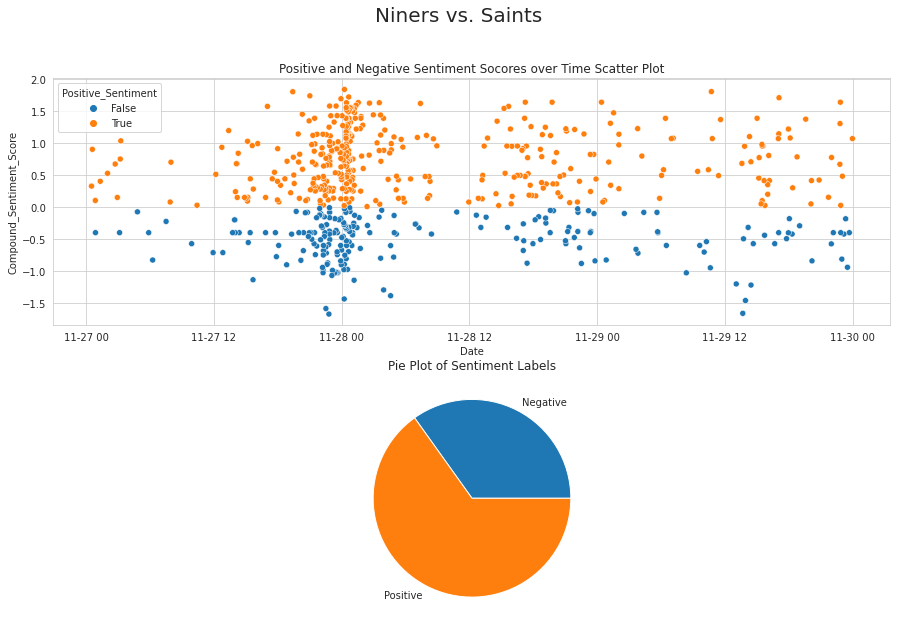

In [11]:
make_scatter_and_pie_figure(niners_dfs[2], 'Niners vs. Saints')

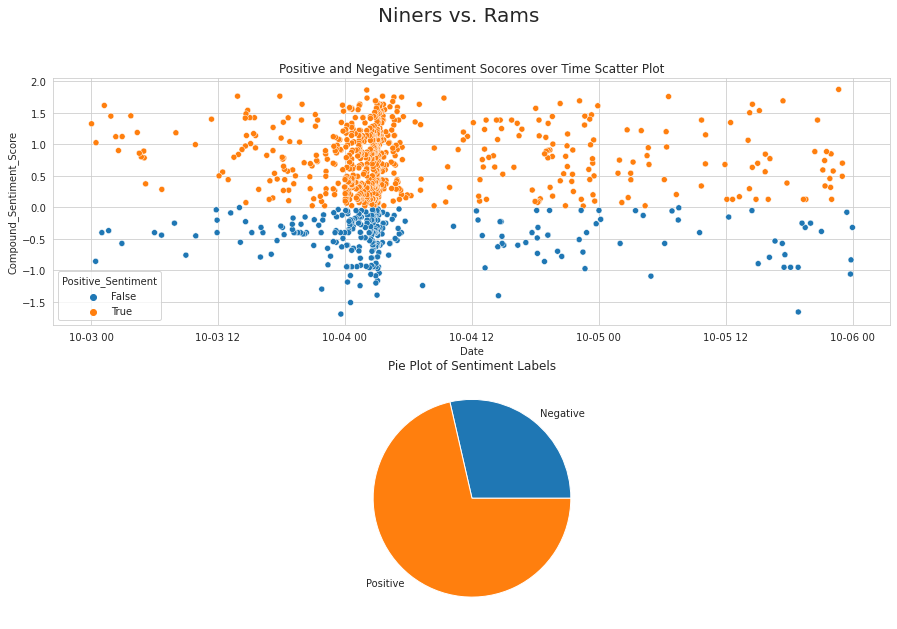

In [12]:
make_scatter_and_pie_figure(niners_dfs[3], 'Niners vs. Rams')

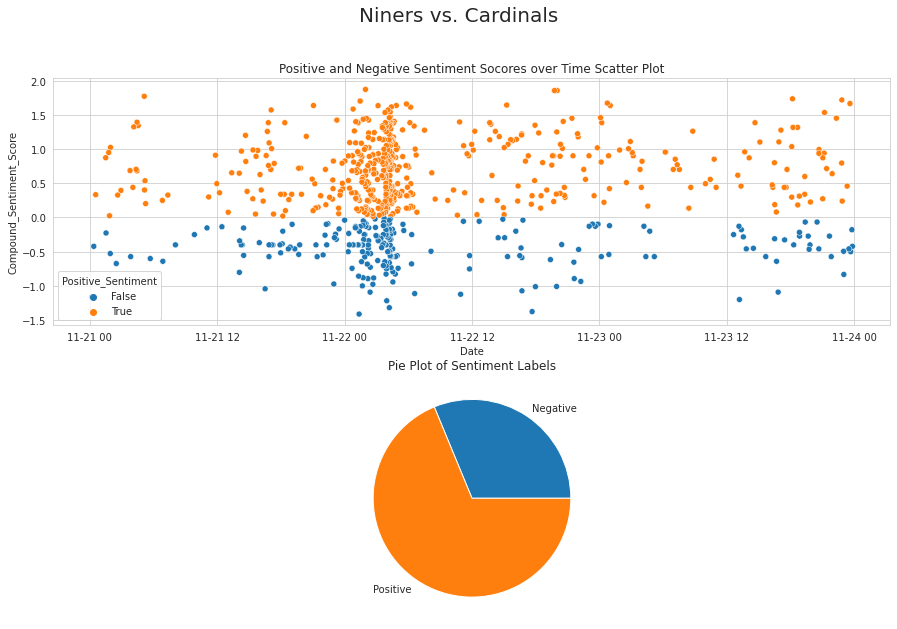

In [13]:
make_scatter_and_pie_figure(niners_dfs[4], 'Niners vs. Cardinals')

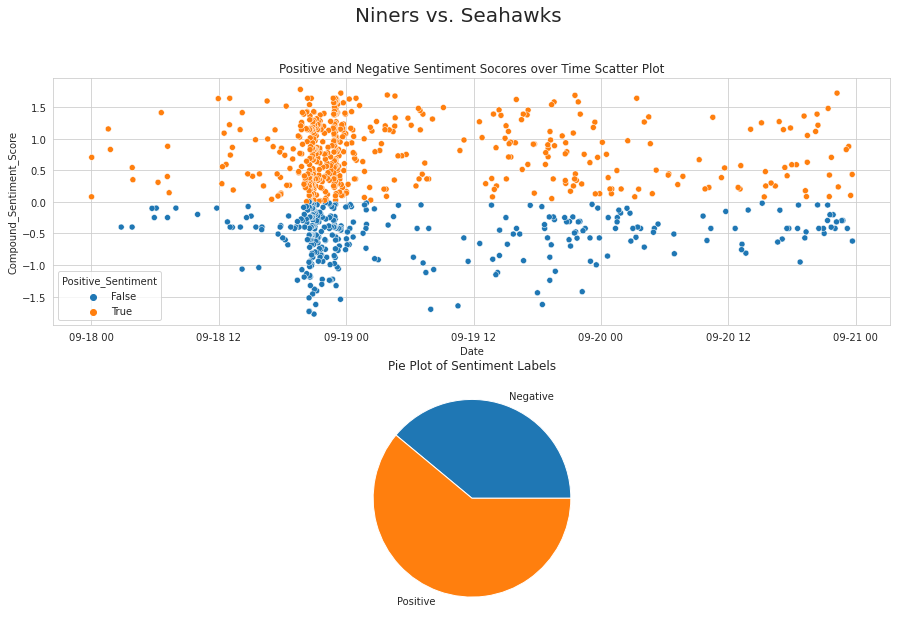

In [14]:
make_scatter_and_pie_figure(niners_dfs[5], 'Niners vs. Seahawks')

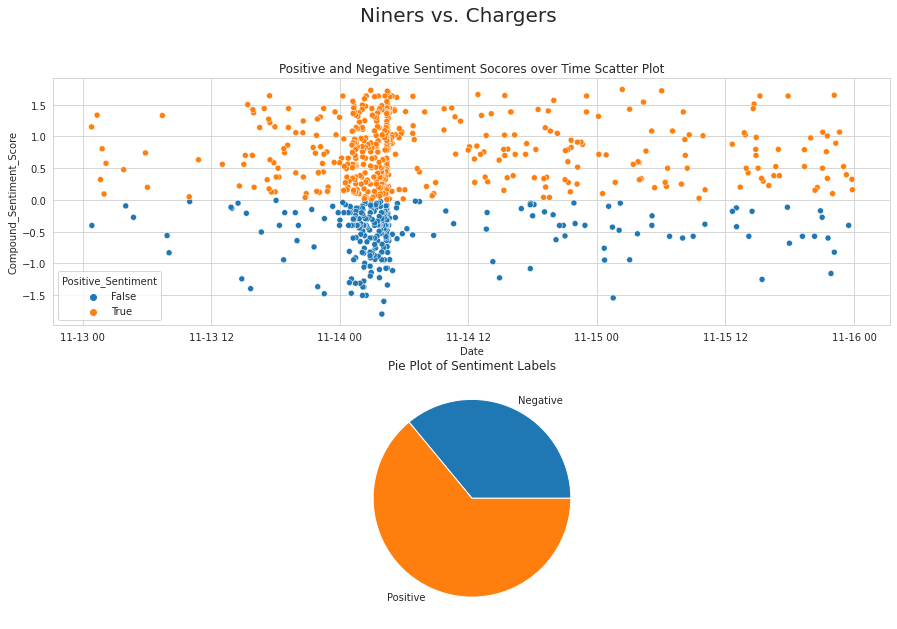

In [15]:
make_scatter_and_pie_figure(niners_dfs[6], 'Niners vs. Chargers')

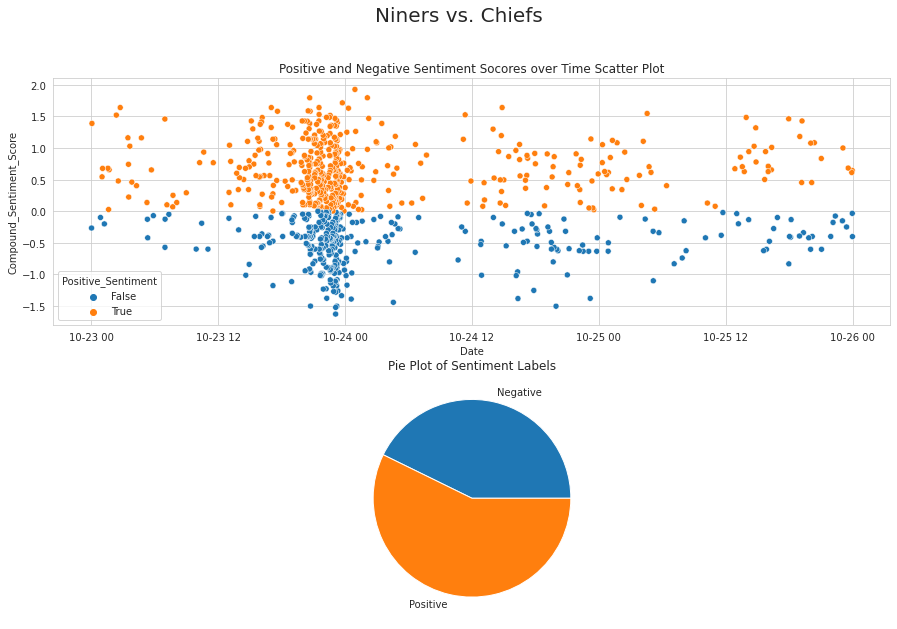

In [16]:
make_scatter_and_pie_figure(niners_dfs[7], 'Niners vs. Chiefs')

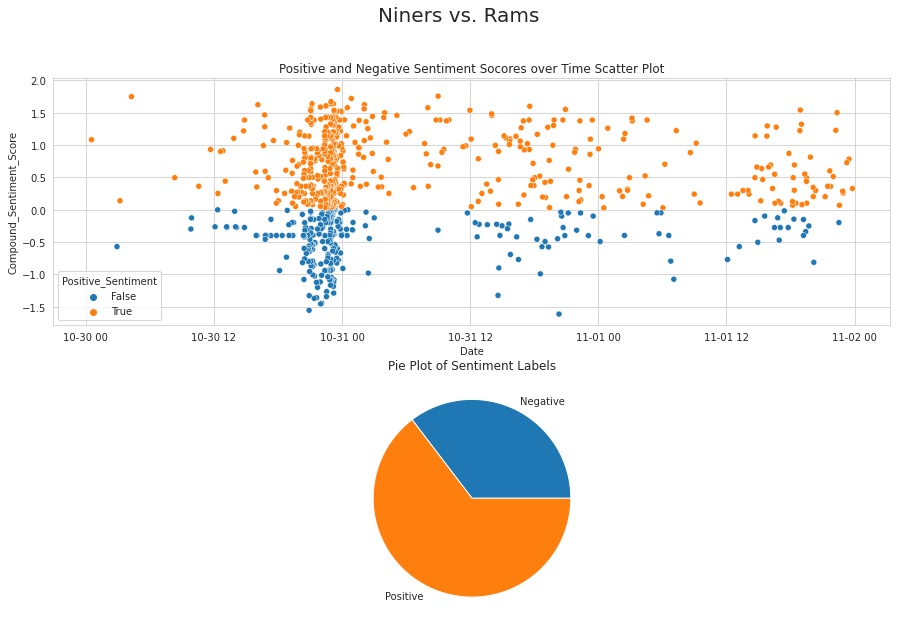

In [17]:
make_scatter_and_pie_figure(niners_dfs[8], 'Niners vs. Rams')

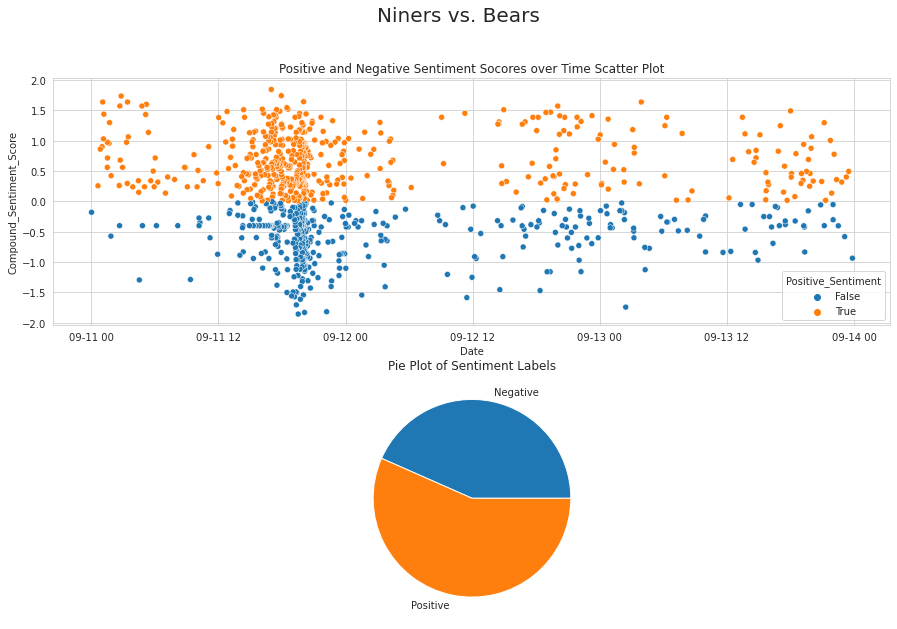

In [18]:
make_scatter_and_pie_figure(niners_dfs[9], 'Niners vs. Bears')

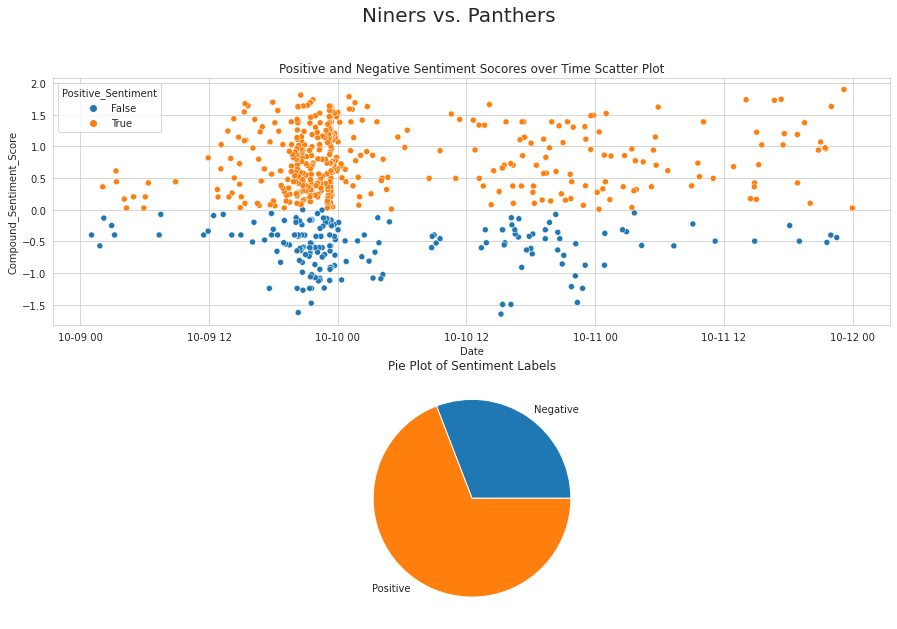

In [19]:
make_scatter_and_pie_figure(niners_dfs[10], 'Niners vs. Panthers')